In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. 데이터 셋 로드
df = pd.read_csv('diamonds.csv')

print("원본 데이터 개수:", len(df))

# carat 열 기준으로 IQR 계산
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"하한 (Lower Bound): {lower_bound}")
print(f"상한 (Upper Bound): {upper_bound}")

# 이상치 제거
df_clean = df[(df['carat'] >= lower_bound) & (df['carat'] <= upper_bound)]
print("이상치 제거 후 데이터 개수:", len(df_clean))

# 범주형 데이터 인코딩 (cut, color, clarity)
categorical_cols = df_clean.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 특징/타겟 분리
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

원본 데이터 개수: 53940
하한 (Lower Bound): -0.5599999999999999
상한 (Upper Bound): 2.0
이상치 제거 후 데이터 개수: 52051


In [12]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# 테스트 데이터를 통한 예측
y_pred = model.predict(X_test)

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("모델 평가 결과")
print(f"MAE(평균 절대 오차): {mae:.2f}")
print(f"MSE(평균 제곱 오차): {mse:.2f}")
print(f"RMSE(평균 제곱근 오차): {rmse:.2f}")
print(f"R2(설명력, 결정계수): {r2:.4f}")

모델 평가 결과
MAE(평균 절대 오차): 670.57
MSE(평균 제곱 오차): 1014223.90
RMSE(평균 제곱근 오차): 1007.09
R2(설명력, 결정계수): 0.9118


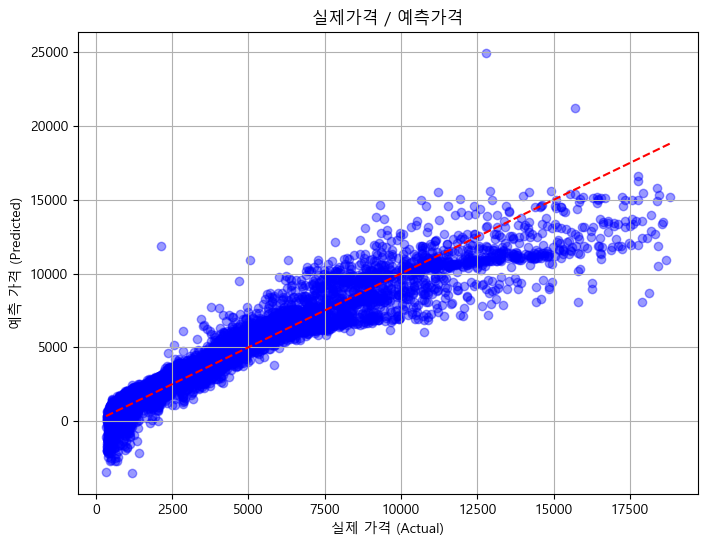

In [19]:
# 9. 예측 결과 시각화 (실제값 vs 예측값)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("실제 가격 (Actual)")
plt.ylabel("예측 가격 (Predicted)")
plt.title("실제가격 / 예측가격")
plt.grid(True)
plt.show()